# Business Analysis with EDA & Statistics

### This project is documented using markdown and then uploaded on git hub
### Data-set for this project is taken from kaggle datasets

*  let's load that initial required libraries

In [150]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/marketing-data/marketing_data.csv


lets look into data first we'll read a file and get a gist of how data is presented
### Reading data

In [151]:
data_path='../input/marketing-data/marketing_data.csv'
df_d= pd.read_csv(data_path)
df=pd.read_csv(data_path,parse_dates=['Year_Birth','Dt_Customer'])

In [152]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970-01-01,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961-01-01,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958-01-01,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967-01-01,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989-01-01,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [154]:
type(df['Year_Birth'][1])
# Dt_Customer & Year birth are converted in to time stamp above

pandas._libs.tslibs.timestamps.Timestamp

- removing garbage values such as '$'  & ',' from the Income column.

In [155]:
df.columns = df.columns.str.strip()
df.Income = df.Income.str.replace('$','')
df.Income = df.Income.str.replace(',','').astype('float')

- We can see that garbage values are removed

In [156]:
df.Income.head(6)

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
5    71691.0
Name: Income, dtype: float64

  lets check if data is clean and if there are any null values present in the dataset

1. Are there any null values or outliers? How will you wrangle/handle them ?

2. Are there any variables that warrant transformations?
 * We already transformed date while reading data using Parse data & income column is to be convertwd into float

In [157]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

- Looking at the data we can see tah tthere are 24 null values present and we will fill it with median values of 
income

In [158]:
df.Income.isnull().sum()
#we need to fill the Nans by median value (Assumption)
# 24 values are null
# check for outliers using boxplot

24

### Exploring data

- From below figure we can see that most data is present between 0-1000
- By taking mean we are avoiding outliers(Imputing)

Text(0, 0.5, 'COUNT')

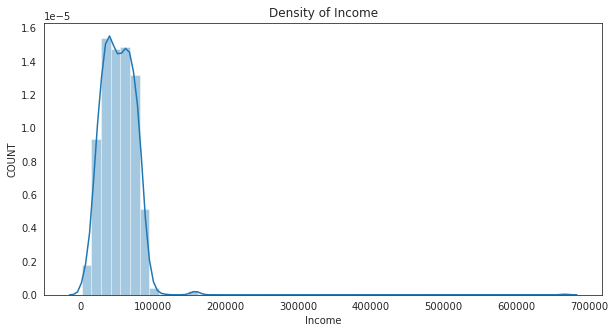

In [159]:
sns.set_style("white")
plt.figure(figsize=(10,5))
sns.distplot(df['Income'],bins=50,kde=True,hist =True)
plt.title('Density of Income')
plt.ylabel('COUNT')

In [160]:
# Income column is clean and we can use it for analysis
df.Income = df.Income.fillna(df.Income.median())

let's find outliers 

for year of birth will have seperate plot

* Year_Birth <= 1900 (Ignored due to errors)

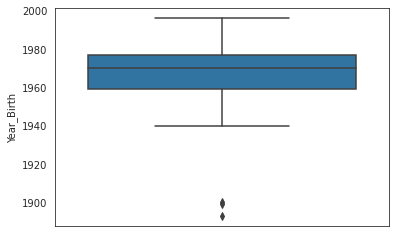

In [161]:
z = pd.DatetimeIndex(df.Year_Birth).year
sns.boxplot(z, orient='v')

In [162]:
Total = [col for col in df.columns if 'Purchases' in col]
print(Total)

['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


3. Are there any useful variables that you can engineer with the given data?

### Useful data
* dependents I.e no of kids or teen
* Total purchases in column (adding all columns contaning purchase)
* total campagin (adding all columns where there is CMP)
* customer year

In [163]:
# Adding depends
df['Dependents']= df['Teenhome'] + df['Kidhome']
#Adding total purchase by creating new column and adding them with columns containing purches
Total = [col for col in df.columns if 'Purchases' in col]
df['Total_purchases'] = df[Total].sum(axis =1)
#adding total mnts
total_mnts = [mnt for mnt in df.columns if 'Mnt' in mnt]
df['Total_mnts']= df[total_mnts].sum(axis=1)
#ADDING cmp 
campagain = [camp for camp in df.columns if 'Cmp' in camp]+ ['Response'] 
# 'Response' is for the latest campaign
df['Total_camps'] = df[campagain].sum(axis=1)
#costumer 
df['year_cust'] = pd.DatetimeIndex(df.Dt_Customer).year
print(Total+total_mnts+campagain)

['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']


In [164]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Total_purchases,Total_mnts,Total_camps,year_cust
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,15,1190,1,2014
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,18,577,2,2014
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,11,251,0,2014
3,1386,1967-01-01,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,4,11,0,2014
4,5371,1989-01-01,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,8,91,2,2014


In [165]:
df[['ID', 'Dependents', 'year_cust', 'Total_purchases', 'Total_mnts', 'Total_camps']].head()

,ID,Dependents,year_cust,Total_purchases,Total_mnts,Total_camps
0,1826,0,2014,15,1190,1
1,1,0,2014,18,577,2
2,10476,1,2014,11,251,0
3,1386,2,2014,4,11,0
4,5371,1,2014,8,91,2


In [166]:
df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Total_purchases,Total_mnts,Total_camps,year_cust
Income,1.000000,-0.449781,0.037879,0.005247,0.629475,0.396516,0.614752,0.394950,0.388781,0.340029,...,0.321469,0.267517,0.085698,0.130692,-0.025298,-0.290763,0.499036,0.648146,0.245894,0.016104
Kidhome,-0.449781,1.000000,-0.045376,0.005171,-0.469633,-0.374417,-0.447802,-0.374982,-0.364820,-0.347895,...,-0.208861,-0.178422,-0.082876,-0.076699,0.039318,0.638642,-0.410018,-0.498612,-0.172682,0.045880
Teenhome,0.037879,-0.045376,1.000000,0.008054,0.090782,-0.166034,-0.102991,-0.189296,-0.163699,-0.018414,...,-0.197795,-0.143626,-0.017403,-0.157613,0.000973,0.661586,0.107374,-0.045261,-0.140234,-0.007401
Recency,0.005247,0.005171,0.008054,1.000000,0.012296,0.017064,0.019052,0.008847,0.016050,0.012306,...,0.000518,-0.015779,-0.001558,-0.162650,0.010896,0.009708,0.006421,0.013394,-0.081190,-0.020844
MntWines,0.629475,-0.469633,0.090782,0.012296,1.000000,0.355790,0.619763,0.361490,0.348953,0.394695,...,0.299281,0.248797,0.113082,0.162869,-0.031121,-0.257845,0.658920,0.767055,0.307643,-0.110715
MntFruits,0.396516,-0.374417,-0.166034,0.017064,0.355790,1.000000,0.532102,0.550670,0.542693,0.413230,...,0.198058,0.148563,0.002319,0.124445,-0.010072,-0.375895,0.422771,0.509684,0.141081,-0.094153
MntMeatProducts,0.614752,-0.447802,-0.102991,0.019052,0.619763,0.532102,1.000000,0.541018,0.518498,0.456852,...,0.271583,0.233508,0.051546,0.182866,-0.020498,-0.390876,0.629453,0.784874,0.247382,-0.113797
MntFishProducts,0.394950,-0.374982,-0.189296,0.008847,0.361490,0.550670,0.541018,1.000000,0.545110,0.409816,...,0.182238,0.176027,-0.000324,0.096285,-0.023915,-0.395639,0.425243,0.519403,0.122944,-0.095250
MntSweetProducts,0.388781,-0.364820,-0.163699,0.016050,0.348953,0.542693,0.518498,0.545110,1.000000,0.396320,...,0.213163,0.184945,-0.000880,0.114186,-0.021394,-0.370551,0.426547,0.499672,0.136601,-0.088271
MntGoldProds,0.340029,-0.347895,-0.018414,0.012306,0.394695,0.413230,0.456852,0.409816,0.396320,1.000000,...,0.157785,0.144684,0.055675,0.150747,-0.028768,-0.249853,0.459577,0.511660,0.201745,-0.156391


In [167]:
type(df.ID[1])

numpy.int64

4. Do you notice any patterns or anomalies in the data? Can you plot them?

lets find correlation between all data using heatmap to get general idea of how data are dependent on each other

In [168]:
df.head(0)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Total_purchases,Total_mnts,Total_camps,year_cust


In [169]:
corr_rex =df.drop(columns = ['ID','Kidhome','Teenhome','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                             'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 
                             'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                             'AcceptedCmp2']).select_dtypes(include=np.number).corr(method = 'kendall')

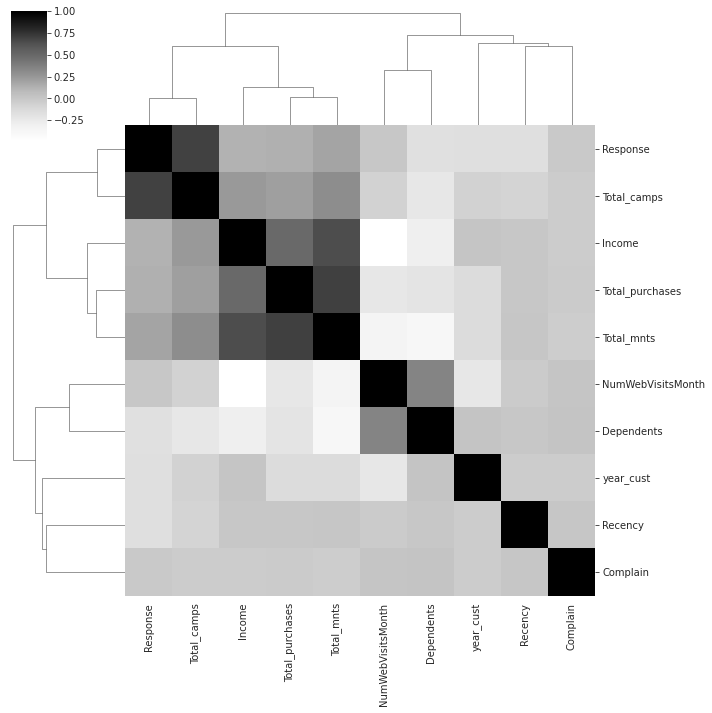

In [170]:
sns.clustermap(corr_rex,cmap='Greys')

In [171]:
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

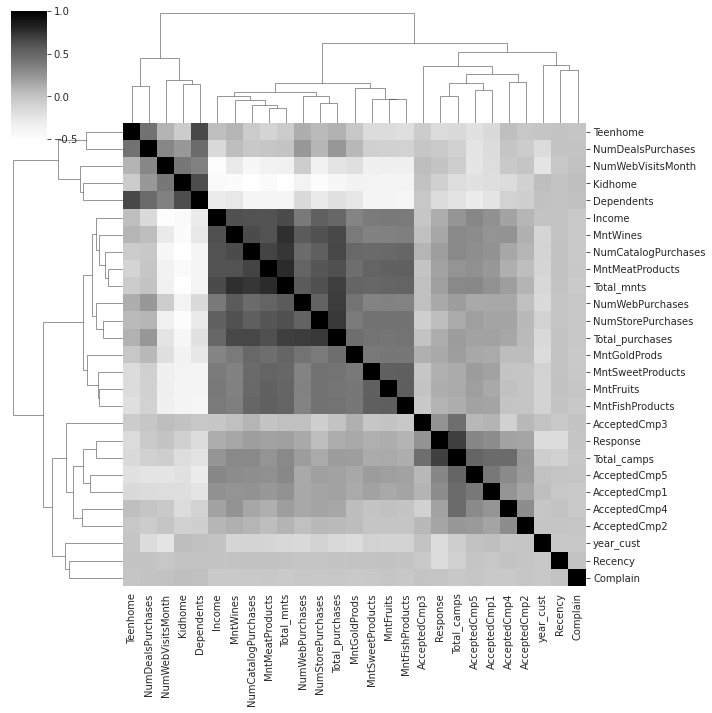

In [172]:
sns.clustermap(corrs, cmap='Greys')

below we are comparing two diffrent cluster maps as we can see corr_rex has is much more neat and precise and better
because we removed dependeces which will help us get  clear picture

looking at dark colours we can determine relation darker the colour stronger relation
* Income is correlated to total purchases, total camps and amounts
* webvists is related to dependents
* Amount spent,number of purchases are weaker to dependents (least correlation) whereas purchasing is correlated with dependents
*

* Plot illustrating the effect of high income on spending(limiting income to < 200000 to remove outlier):

Plot illustrating the effect of high income on spending:


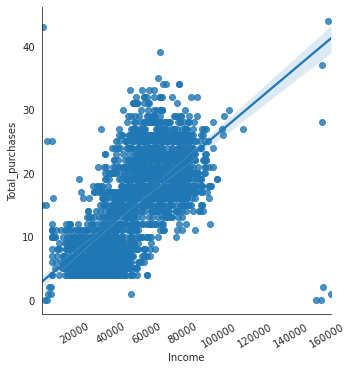

In [173]:
print('Plot illustrating the effect of high income on spending:')
g = sns.lmplot(x='Income',y='Total_purchases',data=df[df['Income'] < 200000])
g.set_xticklabels(rotation=30)

Plot illustrating effect of having dependents (kids & teens) on spending & number of deals purchased:

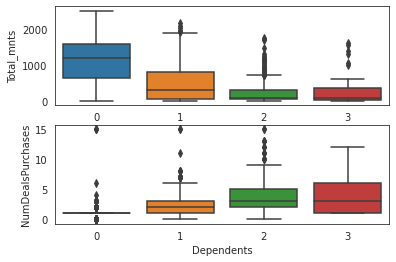

<Figure size 504x504 with 0 Axes>

In [174]:
fig, axs = plt.subplots(2)
plt.figure(figsize=(7,7))
sns.boxplot(x='Dependents', y='Total_mnts', data=df,ax = axs[0])
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df,ax = axs[1])

* number of visits is negatively correlated with web purchases 
* but when compared to vists and deal purchase we found a positive correlation that suggests that deals are effective way to make ppl purchase more

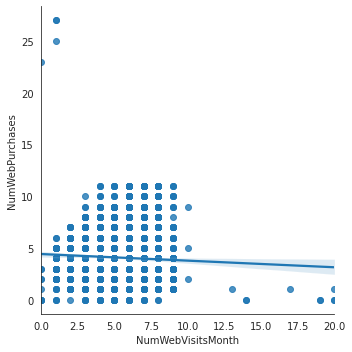

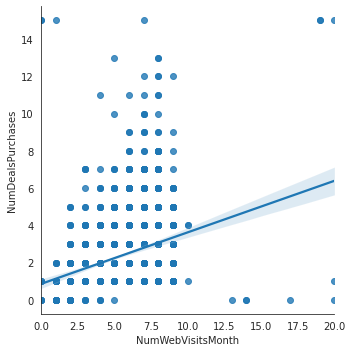

In [175]:
sns.lmplot(x='NumWebVisitsMonth',y='NumWebPurchases',data = df)
sns.lmplot(x='NumWebVisitsMonth',y='NumDealsPurchases',data = df)

## statistical analysis

1. What factors are significantly related to the number of store purchases?

-use a linear regression model with NumStorePurchases as the target variable & use machine learning models
- plotting target variable

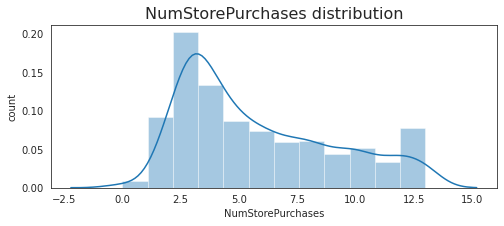

In [176]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=True, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

now we'll do some modeling

In [177]:
type(df.Year_Birth[2])

pandas._libs.tslibs.timestamps.Timestamp

* Drop unwanted attributes such as id and customer 
* We can also use pd.get_dummies 
* We are not using label

In [178]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [179]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
# get categorical features and review number of unique values
cat=df.select_dtypes(exclude= np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())
# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)
# merge with numeric data
num = df.drop(columns =cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Number of unique values per categorical feature:
 Year_Birth        59
Education          5
Marital_Status     8
Country            8
dtype: int64


,Year_Birth_1893-01-01T00:00:00.000000000,Year_Birth_1899-01-01T00:00:00.000000000,Year_Birth_1900-01-01T00:00:00.000000000,Year_Birth_1940-01-01T00:00:00.000000000,Year_Birth_1941-01-01T00:00:00.000000000,Year_Birth_1943-01-01T00:00:00.000000000,Year_Birth_1944-01-01T00:00:00.000000000,Year_Birth_1945-01-01T00:00:00.000000000,Year_Birth_1946-01-01T00:00:00.000000000,Year_Birth_1947-01-01T00:00:00.000000000,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Total_purchases,Total_mnts,Total_camps,year_cust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,15,1190,1,2014
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,18,577,2,2014
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,11,251,0,2014
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2,4,11,0,2014
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,8,91,2,2014


* split the data set into traning(70%) and test(30%) data set
 * findings : Rmse is significantly smaller than median value indicating good model

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.710482326580763e-13
Median value of target variable:  5.0


 * 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases' are significant in     weights compared to rest

In [181]:
import eli5 
from eli5.sklearn import  PermutationImportance
perm =PermutationImportance(model,random_state=1).fit(X_train,y_train)
eli5.show_weights(perm,feature_names = X_test.columns.tolist(),top = 5)

#### Inference 
* total purchase shows a positive trend compared to others 
* whereas other major factors are in negative trend

so we can conclude that no of store purchases are not due to websites,catlogs,deals .

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


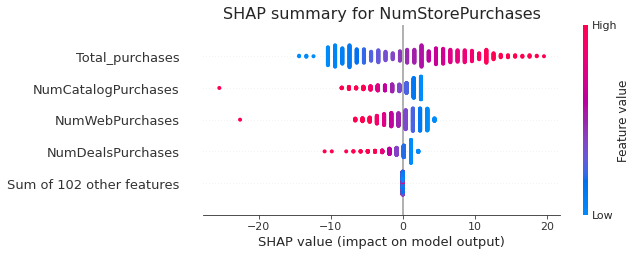

In [182]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

2. Does US fare significantly better than the Rest of the World in terms of total purchases?

* Purchases are better in spain holding the top position compared to that US is not doing well.
* Spain is greater in total purchases and total amount spent.

In [183]:
xa = df.groupby(df.Country).Total_purchases.sum().sort_values(ascending=False)
xb =df.groupby('Country')['Total_mnts'].sum().sort_values(ascending=False)
xa

Country
SP     16052
SA      5117
CA      4101
AUS     2314
IND     2099
GER     1788
US      1761
ME        59
Name: Total_purchases, dtype: int64

In [184]:
xb

Country
SP     662220
SA     211071
CA     168532
AUS     89763
IND     79485
GER     74913
US      67882
ME       3122
Name: Total_mnts, dtype: int64

In [185]:
pd.options.plotting.backend = 'matplotlib'

Text(0, 0.5, 'purchases')

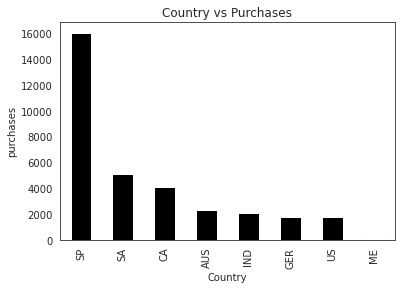

In [186]:
df.groupby(['Country']).Total_purchases.sum().sort_values(ascending=False).plot(kind ='bar',colormap ="cubehelix")
plt.title('Country vs Purchases')
plt.ylabel("purchases")

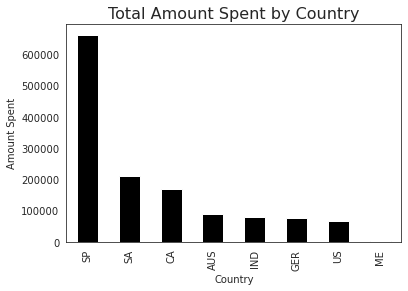

In [187]:
df.groupby('Country')['Total_mnts'].sum().sort_values(ascending=False).plot(kind ='bar',colormap ="cubehelix")
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

In [188]:
df2['Married_PhD'] = df2['Marital_Status_Married']+df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

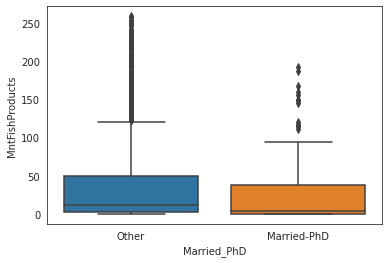

In [189]:
sns.boxplot(x='Married_PhD',y='MntFishProducts',data =df2)

In [190]:
df2.drop(columns='Married_PhD', inplace=True)

What other factors are significantly related to amount spent on fish?

* RSME is significantly samller that median so the model works out to be good

In [191]:
X = df2.drop(columns = 'MntFishProducts')
y= df2['MntFishProducts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.25181749850074e-13
Median value of target variable:  12.0


* TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits' are significat in weights compared to rest.

In [192]:
cnc = PermutationImportance(model,random_state =1).fit(X_test,y_test)
eli5.show_weights(cnc,feature_names = X_test.columns.tolist(), top=7)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


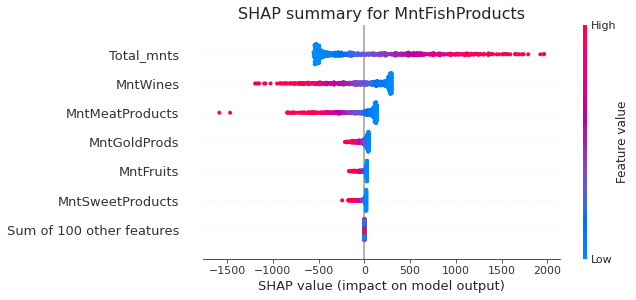

In [193]:
#shap
ex = shap.Explainer(model,X_train)
shap_values = ex(X_test)
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

### Infernce from above graph
* total_mnts is positive for fish products 
* where as fruits,meat,wines,sweets are in negative co-relation

#### to summarise
* the ones who are buying fish are spending less on other above mentioned products

### Section 03: Data Visualization

Which marketing campaign is most successful?

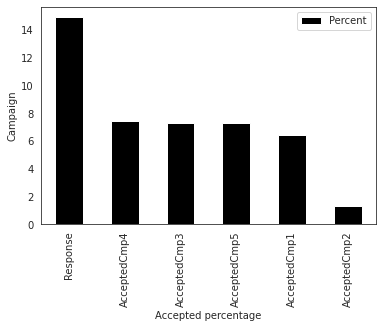

In [194]:
pd.DataFrame(
    df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
    .mean()*100,columns=['Percent']).sort_values(by ='Percent',ascending =False).plot(kind = "bar",xlabel='Accepted percentage', ylabel='Campaign',colormap="cubehelix")

All are in categorical order

1. What does the average customer look like for this company?
1. Which products are performing best?
1. Which channels are underperforming?


> 1. Average Characterstics of Customer(Currency : dollars):
    * Income is	           $52238$ dollars
    * Year of becoming Customer is  $2013$
    * Year of Birth is             $1969$
    * No Of Dependents $ 1 $
    * spent On wines $300+$ dollars
    * $25-50$ dollars on Fruits, Sweets, Fish, or Gold products
    * $160+ $ dollars on Meat products
    * $300+ $ dollars on Wines
    * $600+ $ dollars total  
> 1. Products performing best:
    * Wines
    * Followed by meats   
> 1. Channels: 
    * Accepted less than 1 advertising campaign
    * Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
    * Averaged 14 total purchases
    * Visited the website 5 times
> 1. Underperforming channels:
    * Advertising campaigns
    * Followed by deals, and catalog
  

In [195]:
df['Birth_year']=df['Year_Birth'].dt.year

In [196]:
round(df.mean().sort_values(ascending =False).head(20))

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


,0
Income,52238.0
year_cust,2013.0
Birth_year,1969.0
Total_mnts,606.0
MntWines,304.0
MntMeatProducts,167.0
Recency,49.0
MntGoldProds,44.0
MntFishProducts,38.0
MntSweetProducts,27.0


> ## Conclusion

1. Purchasing  through websites should be improved by  Easing coustmer feel
2. Spain being the top Coustmer and an established market.More markets in diffrent country needs improvement 
 studing the local market may change things
3. Boosting of sales must be done on less Famous products
4. Advertising Should be done on Famous produts to improve reach
1. Biforcate income categories into High income and low income categories and target accordingly
1. Some area may yeild more profits